In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
heart_diseases = pd.read_csv('heart-disease.csv')

In [3]:
heart_diseases.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
np.random.seed(42)
X = heart_diseases.drop('target',axis=1)
y = heart_diseases['target']

In [5]:
clf = RandomForestClassifier()

In [6]:
cross_val_score(clf,X,y,cv=5).mean()

0.8248087431693989

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [8]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [9]:
clf.score(X_test,y_test)

0.8032786885245902

### Area under ROC curve

In [14]:
from sklearn.metrics import roc_curve

In [10]:
y_probs = clf.predict_proba(X_test)

In [11]:
y_probs_positive = y_probs[:,1]

In [12]:
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [15]:
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

In [16]:
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [17]:
# create function for plotting roc curve
import matplotlib.pyplot as plt

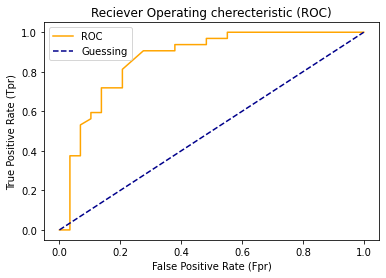

In [18]:
def plot_roc_curve(fpr,tpr):
    """
    Plot a ROC curve given fpr and tpr
    """
    plt.plot(fpr,tpr,color='orange',label='ROC')
    
    # ploting a no predictive power plot
    #plt.plot([0,1],[0,1],color='darkblue',label='Guessing',linestyle='--')
    
    # Customize plot
    plt.xlabel('False Positive Rate (Fpr)')
    plt.ylabel('True Positive Rate (Tpr)')
    plt.title('Reciever Operating cherecteristic (ROC)')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [19]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.8669181034482759